# Imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


# Load data

In [53]:
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

# Data Exploration


In [10]:
# À quel point les maisons Airbnb sont-elles occupées?

print('nous avons', calendar.date.nunique(), 'jours et', calendar.listing_id.nunique(), 'maisons uniques.')

nous avons 374 jours et 3105 maisons uniques.


In [11]:
## Les données du calendrier couvrent une période d'un an
calendar.date.min(), calendar.date.max()

('2020-12-21', '2021-12-29')

In [12]:
## calendar preview
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1109224,2020-12-21,f,$439.00,$439.00,2,90
1,1109224,2020-12-22,t,$439.00,$439.00,2,90
2,1109224,2020-12-23,t,$439.00,$439.00,2,90
3,1109224,2020-12-24,t,$439.00,$439.00,2,90
4,1109224,2020-12-25,t,$469.00,$469.00,2,90


In [13]:
## calendar shape
calendar.shape

(1133325, 7)

In [14]:
## null values in calendar ??
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [15]:
## available column ??
## f (false) means not available, t(true) means available.
calendar.available.value_counts()

available
t    582910
f    550415
Name: count, dtype: int64

In [16]:
# Découvrez la disponibilité moyenne quotidienne sur un an.
# Convertissez la colonne en 0 si elle est disponible et en 1 si elle ne l'est pas.
calendar_ = calendar[['date', 'available']].copy()
calendar_['busy'] = calendar_.available.map( lambda x: 0 if x == 't' else 1) ## calendar_.available.map({"f":1, "t":0})
calendar_ = calendar_.groupby('date')['busy'].mean().reset_index()
calendar_['date'] = pd.to_datetime(calendar_['date'])

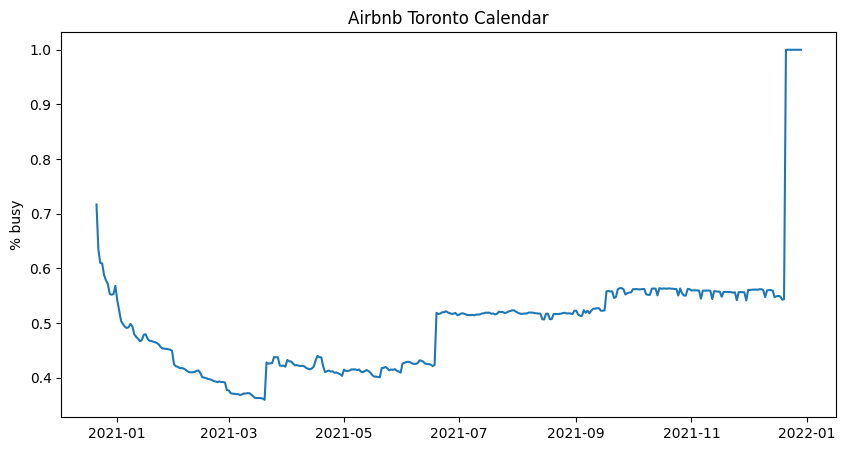

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(calendar_['date'], calendar_['busy'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% busy')
plt.show();

## Le mois le plus chargé a été décembre 2021.

## Prices on the Calendar

In [18]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1109224,2020-12-21,f,$439.00,$439.00,2,90
1,1109224,2020-12-22,t,$439.00,$439.00,2,90
2,1109224,2020-12-23,t,$439.00,$439.00,2,90
3,1109224,2020-12-24,t,$439.00,$439.00,2,90
4,1109224,2020-12-25,t,$469.00,$469.00,2,90


In [19]:
# Supprimez le symbole « $ » dans la colonne de prix
# et convertissez-le en numérique,
# puis convertissez la date en type de données datetime.
calendar['price'] = calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])


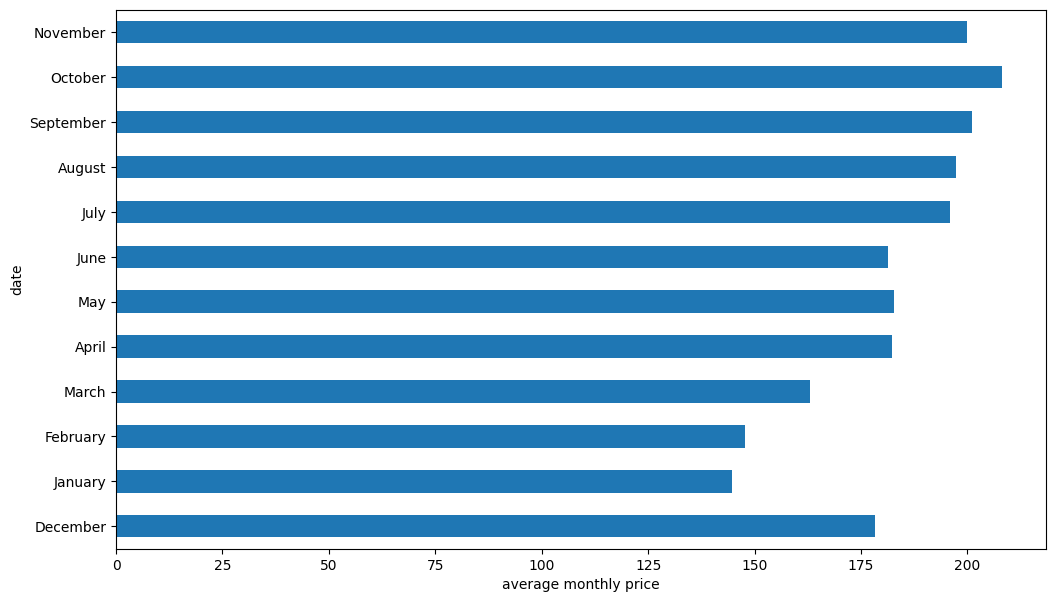

In [20]:
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

# Le prix des logements Airbnb augmente au cours des mois de octobre, sept et novem.
# Certes, ces trois mois sont les meilleurs pour visiter la ville.

## Listings

In [21]:
## nombre de maisons dans notre fichier listings
print('nous avons', listings.id.nunique(), 'listings')

nous avons 3106 listings


In [22]:
# Le quartier qui compte le plus grand nombre d'annonces est  Dorchester.
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Dorchester,386
Downtown,331
Jamaica Plain,242
Roxbury,224
Brighton,216
South End,197
Back Bay,189
East Boston,179
South Boston,154


In [23]:
## Explore Prices
listings.price

0       $132.00
1       $169.00
2        $70.00
3        $73.00
4        $75.00
         ...   
3101     $44.00
3102    $180.00
3103    $169.00
3104    $120.00
3105    $150.00
Name: price, Length: 3106, dtype: object

In [24]:
listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [25]:
listings['price'].describe()

count    3106.000000
mean      144.753703
std       155.607881
min         0.000000
25%        69.000000
50%       109.000000
75%       169.000000
max      3999.000000
Name: price, dtype: float64

In [26]:
## min price = 0 ??? need to deal with it
listings.iloc[np.argmin(listings['price'])]

id                                                                           41740613
listing_url                                     https://www.airbnb.com/rooms/41740613
scrape_id                                                              20201221044328
last_scraped                                                               2020-12-21
name                                                             The Revolution Hotel
                                                                ...                  
calculated_host_listings_count                                                      1
calculated_host_listings_count_entire_homes                                         0
calculated_host_listings_count_private_rooms                                        0
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                 NaN
Name: 2297, Length: 74, dtype: object

In [27]:
listings.iloc[np.argmax(listings['price'])]

id                                                                                      13657486
listing_url                                                https://www.airbnb.com/rooms/13657486
scrape_id                                                                         20201221044328
last_scraped                                                                          2020-12-21
name                                            Large, modern 2br, 2ba renovated 6/16 with patio
                                                                      ...                       
calculated_host_listings_count                                                                 1
calculated_host_listings_count_entire_homes                                                    1
calculated_host_listings_count_private_rooms                                                   0
calculated_host_listings_count_shared_rooms                                                    0
reviews_per_month             

In [28]:
## maybe it's better, we remove listings > 600$ and equals to 0

In [29]:
listings.loc[listings['price'] == 0]['price'].count()

3

### Distribution des prix des annonces après suppression des valeurs aberrantes

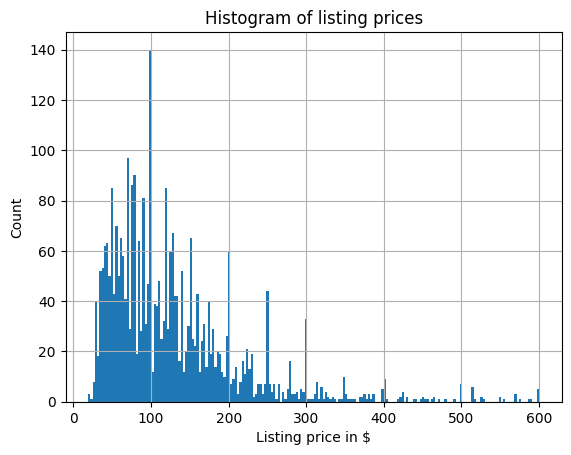

In [30]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

In [31]:
## les types

In [32]:
listings.room_type.value_counts()

room_type
Entire home/apt    1984
Private room       1085
Hotel room           26
Shared room          11
Name: count, dtype: int64

In [33]:
## Prix ​​moyen des annonces dans les quartiers par type de pièce
stats = listings.groupby(['neighbourhood_cleansed','room_type'])['price'].agg(['mean','std','count'])

In [34]:
stats

mean         std  count
neighbourhood_cleansed room_type                                     
Allston                Entire home/apt  167.246154  165.415200     65
                       Private room      66.741176   23.424221     85
                       Shared room       30.000000         NaN      1
Back Bay               Entire home/apt  175.098837  147.813129    172
                       Hotel room       122.857143   55.517050      7
...                                            ...         ...    ...
West End               Entire home/apt  242.096774  219.614109     31
                       Private room     106.250000   34.970225      4
West Roxbury           Entire home/apt  281.666667  316.216605     18
                       Private room     213.400000  339.235443     15
                       Shared room       49.000000         NaN      1

[66 rows x 3 columns]

In [28]:
## Amenities

In [36]:
listings["amenities"]

0       ["Cable TV", "Hangers", "Wifi", "Free street p...
1       ["Cable TV", "Hangers", "Wifi", "Free street p...
2       ["Cable TV", "Hangers", "Wifi", "Kitchen", "Fi...
3       ["Cable TV", "Hangers", "Lockbox", "Wifi", "Ki...
4       ["Bathtub", "Cable TV", "Hangers", "Freezer", ...
                              ...                        
3101    ["Smoke alarm", "TV", "Carbon monoxide alarm",...
3102    ["Smoke alarm", "TV", "Hair dryer", "Iron", "H...
3103    ["Hangers", "Wifi", "Elevator", "Kitchen", "Lo...
3104    ["Smoke alarm", "First aid kit", "Carbon monox...
3105    ["Coffee maker", "Bed linens", "Microwave", "S...
Name: amenities, Length: 3106, dtype: object

In [37]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [38]:
listings['amenities'].head()

0    [Cable TV, Hangers, Wifi, Free street parking,...
1    [Cable TV, Hangers, Wifi, Free street parking,...
2    [Cable TV, Hangers, Wifi, Kitchen, Fire exting...
3    [Cable TV, Hangers, Lockbox, Wifi, Kitchen, Fi...
4    [Bathtub, Cable TV, Hangers, Freezer, Wifi, Ki...
Name: amenities, dtype: object

In [31]:
## Top 20 most common amenities
## Wifi, heating, essential, kitchen and carbo alarm etc are among the most common amenities.


<Axes: >

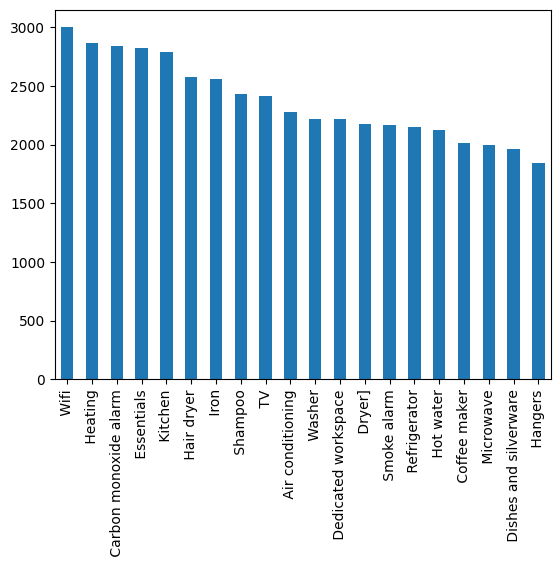

In [39]:
pd.Series(np.concatenate(
    listings['amenities'].map(lambda amns: amns.split(","))
    )).value_counts().head(20).plot(kind='bar')

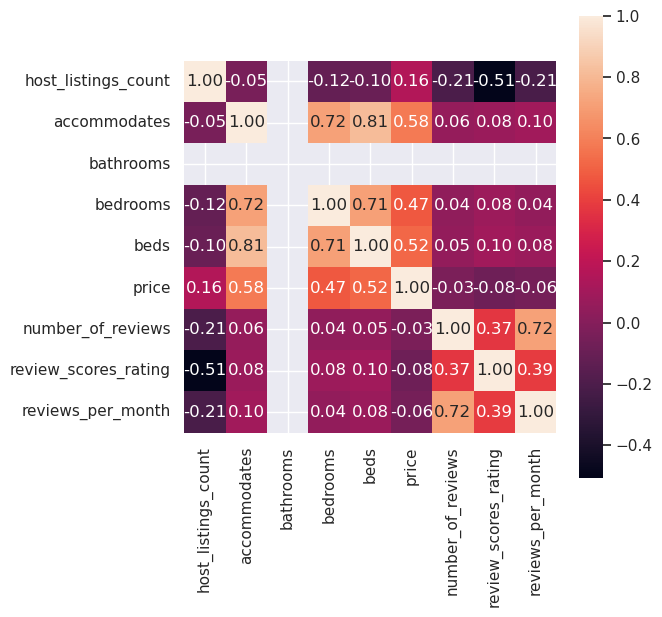

In [33]:
## numeric features
## let's select some numeric features

col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].fillna(0).corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show()

## Data preprocessing

In [41]:
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

In [42]:
# removing comma and currency sign from column price
listings.price = listings.price.str.replace(r'[$,]','',regex=True).astype('float') 

# removing comma and currency sign from column price
calendar.price = calendar.price.str.replace(r'[$,]','',regex=True).astype('float')

In [43]:
def remove_outliers(
    df : pd.DataFrame, # pandas dataframe from which the outliers need to be removed
    col: str, # column from which the outliers need to be removed
    group_col: str ='room_type', # column name to group by (default: 'room_type')
    lower_quantile=0.001,  # lower bound quantile for outlier filtering (default: 0.001)
    upper_quantile=0.999 # upper bound quantile for outlier filtering (default: 0.999)
)-> pd.DataFrame: # pandas DataFrame with outliers removed within each group
    
    "Removes outliers from the specified column within each group of the group_col"
    # Check if column exists
    if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in the DataFrame.")
    
    if group_col not in df.columns:
        raise ValueError(f"Group column '{group_col}' does not exist in the DataFrame.")
    
    filtered_list = []
    room_types = df.groupby(group_col)
    
    for _, group in room_types:
        # Calculate quantiles
        lower_bound = group[col].quantile(lower_quantile)
        upper_bound = group[col].quantile(upper_quantile)
        
        # Filter out outliers
        temp_df = group[(group[col] > lower_bound) & (group[col] < upper_bound)]
        filtered_list.append(temp_df)
    
    # Concatenate all the filtered groups
    filtered_df = pd.concat(filtered_list, ignore_index=True)
    
    return filtered_df


In [44]:
# removing outliers from dataframe based on price against every room_type
listings = remove_outliers(
    df=listings,
    col='price',
    group_col='room_type',
    lower_quantile=0.01,
    upper_quantile=0.99
)

In [45]:
# converting date to pandas format
calendar.date = pd.to_datetime(calendar.date)

## Feature selection 

In [46]:
cols = ['host_since','last_scraped','host_verifications','amenities','calculated_host_listings_count',
        'bedrooms','accommodates','beds','minimum_nights','maximum_nights',
        'neighbourhood_cleansed','room_type',
        'number_of_reviews','reviews_per_month','review_scores_rating',
        'price',
       'host_response_rate','host_acceptance_rate']

data = listings.copy()[cols]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      3024 non-null   object 
 1   last_scraped                    3024 non-null   object 
 2   host_verifications              3024 non-null   object 
 3   amenities                       3024 non-null   object 
 4   calculated_host_listings_count  3024 non-null   int64  
 5   bedrooms                        2680 non-null   float64
 6   accommodates                    3024 non-null   int64  
 7   beds                            3003 non-null   float64
 8   minimum_nights                  3024 non-null   int64  
 9   maximum_nights                  3024 non-null   int64  
 10  neighbourhood_cleansed          3024 non-null   object 
 11  room_type                       3024 non-null   object 
 12  number_of_reviews               30

In [41]:
num_cols = data.describe().columns.values

In [42]:
# filling empty values with the mean
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

### Deal with some columns

In [43]:
# converting bedrooms type from float to int
data.bedrooms = data.bedrooms.astype('int')

In [44]:
# remove characters from numerical features for casting as numerical
data.host_response_rate = data.host_response_rate.str.replace('%','').astype('float')
data.host_acceptance_rate = data.host_acceptance_rate.str.replace('%','').astype('float')

In [45]:
def calculate_days(
    row: pd.Series, # pd.Series with two date columns in format '%Y-%m-%d'
)-> int: #  the differece between two datestamps in days
    "calculates the days between the given timestamps"
    try:
        # parse dates or return NaN for invalid/missing values
        date1 = pd.to_datetime(row.iloc[0], format='%Y-%m-%d', errors='coerce')
        date2 = pd.to_datetime(row.iloc[1], format='%Y-%m-%d', errors='coerce')
        
        # return NaN if null dates
        if pd.isnull(date1) or pd.isnull(date2):
            return pd.NA
        
        # calculate the absolute difference in days
        return abs((date2 - date1).days)
    
    except Exception as e:
        print(f"Error processing row: {row}, Error: {e}")
        return pd.NA


In [46]:
# ad posters presence on platform in days since the ad
data['host_since_days'] = data[['host_since','last_scraped']].apply(calculate_days, axis=1)
data.drop(columns=['host_since','last_scraped'],inplace=True)

In [47]:
# parsing the column 'host_verifications' and 'amenities' into features

data['host_verifications'].head()

0                        ['email', 'phone', 'reviews']
1                 ['email', 'phone', 'reviews', 'kba']
2    ['email', 'phone', 'reviews', 'jumio', 'offlin...
3    ['email', 'phone', 'reviews', 'jumio', 'offlin...
4                                   ['email', 'phone']
Name: host_verifications, dtype: object

In [48]:
data['amenities'].head()

0    ["Cable TV", "Hangers", "Wifi", "Free street p...
1    ["Cable TV", "Hangers", "Wifi", "Free street p...
2    ["Cable TV", "Hangers", "Wifi", "Kitchen", "Fi...
3    ["Cable TV", "Hangers", "Lockbox", "Wifi", "Ki...
4    ["Bathtub", "Cable TV", "Hangers", "Freezer", ...
Name: amenities, dtype: object

In [49]:
import ast
from typing import List

def get_unique_features(
    df: pd.DataFrame, # DataFrame containing the column with a list of values in string format for every record.
    column: str, # column name that contains the list values like amenities and host_verifications
)-> List: # list of unique features in the column
    "returns all unique values from a df column that contains lists as strings"
    
    unique_features = set()  # use a set to avoid duplicates
    
    # iterate through each row in the column
    for i in df[column]:
        try:
            # safely evaluate the string to convert it into a list
            feature_list = ast.literal_eval(i) if isinstance(i, str) else i
            if isinstance(feature_list, list):
                unique_features.update(feature_list)
        except (ValueError, SyntaxError):
            print(f"Skipping invalid entry: {i}")
    
    unique_features = list(unique_features)
    return unique_features


def get_list_as_features(
    slist: str, # string representation of a list like "['email', 'phone', 'reviews']"
    unique_features: List, # list of all possible unique features
)-> pd.Series:
    
    "returns a pandas Series where the index represents unique features and values are 1 or 0 depending on whether the feature is present in the input list."
    try:
        feature_list = ast.literal_eval(slist) if isinstance(slist, str) else slist
        if not isinstance(feature_list, list):
            feature_list = []
    except (ValueError, SyntaxError):
        feature_list = []
    
    # create a Series of zeros
    series = pd.Series(0, index=unique_features)
    
    # set to 1 for features present in the input list
    series.loc[series.index.isin(feature_list)] = 1
    
    return series

# parsing the column 'host_verifications' and 'amenities' into unique features
hv_unique_features = get_unique_features(data, 'host_verifications')
am_unique_features = get_unique_features(data, 'amenities')

# applying the feature extraction function to the dataset
data = pd.concat([
    data,
    data['host_verifications'].apply(get_list_as_features, args=(hv_unique_features,)
)], axis=1
)
data = pd.concat([
    data,
    data['amenities'].apply(get_list_as_features, args=(am_unique_features,)
)], axis=1
)

# drop the original columns
data.drop(['host_verifications', 'amenities'], axis=1, inplace=True)


## Encoding Categorical Features

### we can use : 

1. get dummies : (Pandas) 
    - Pros : Easy to use, fast, and works well for a small number of categories.
    - Cons : Doesn't handle unseen categories in test data (can only handle categories present in the training data).
        
2. OneHotEncoder : (Scikit-learn)
    - Pros : Can handle unseen categories in new/test data using handle_unknown='ignore'
    - Cons : Returns a NumPy array or sparse matrix by default, so if you're working with DataFrames, you'll need to convert it back.



In [50]:
# separate categorical and numerical features
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(exclude='object').columns.tolist()

In [51]:
# use get dummies method to encode categorical features
encoded = pd.get_dummies(data[cat_cols],drop_first=True).astype('int')
data = pd.concat([data[num_cols],encoded],axis=1)

In [52]:
encoded

,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,...,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3020,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3022,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
# data shape
print(data.shape)

(3024, 262)
